In [32]:
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sbn

In [27]:
def evaluate_model(model, X_train, y_train, cv):
    list_specificity = []
    list_sensibility = []
    scores = cross_validate(model, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1, return_estimator=True)
    estimators = scores['estimator']
    print(f"Accuracy: {np.mean(scores['test_score'])}\n\n")
    for i, (train_index, test_index) in enumerate(cv.split(X_train)):
    
        X_pred = X_train[test_index]
        y_ground = y_train[test_index]
        y_pred = estimators[0].predict(X_pred)
        tn, fp, fn, tp = confusion_matrix(y_ground, y_pred).ravel()
        sensibility = tp / (tp + fn)
        specificity = tn / (tn + fp)
        list_sensibility.append(sensibility)
        list_specificity.append(specificity)
    
        print(f"Fold {i}")
        print(f'Number of samples: {len(X_pred)}')
        print(f"Mean Specificity= {specificity}")
        print(f"Mean Sensibility= {sensibility}\n\n")
  
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_ground, y_pred), display_labels=['Non Infart', 'Infart']).plot()
        plt.grid(False)
        plt.show()
    
    print(f"Mean Specificity= {np.mean(list_specificity)} Std: {np.std(list_specificity)}")
    print(f"Mean Sensibility= {np.mean(list_sensibility)}  Std: {np.std(list_sensibility)}")
    return estimators

In [9]:
def evaluate_kfold(list_of_estimators, X_total, y_total):
    # Verificando a media com todos os elementos e classificadores
    list_sensibility = []
    list_specificity = []
    for i, estimator in enumerate(list_of_estimators):
        X_pred = X_total
        y_truth = y_total
        y_pred = estimator.predict(X_pred)
        tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
        sensibility = tp / (tp + fn)
        specificity = tn / (tn + fp)
        print(f'Number of samples: {len(X_pred)}')
        print(f"Specificity= {specificity}")
        print(f"Sensibility= {sensibility}\n\n")
        list_sensibility.append(sensibility)
        list_specificity.append(specificity)
  
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_truth, y_pred), display_labels=['Non Infart', 'Infart']).plot()
        plt.grid(False)
        plt.show()

    print(f"Mean Specificity= {np.mean(list_specificity)} Std: {np.std(list_specificity)}")
    print(f"Mean Sensibility= {np.mean(list_sensibility)}  Std: {np.std(list_sensibility)}")


In [10]:
# Seed
seed = rd.randint(0,99999999)

In [11]:
df = pd.read_csv('../data/complete_dataset.csv')

In [12]:
df.head()

,Unnamed: 0,corrente_anodica,corrente_catodica,carga,diff_corrente_anodica_catodica,diff_pot_anodico_catodico,pico_derivada_anodica,pico_derivada_catodica,target
0,0,111.206245,-128.070497,582.026580,239.276743,0.205634,84.763748,-89.000926,1
1,1,117.477703,-132.831311,554.636573,250.309014,0.199645,88.426733,-92.060480,1
2,2,111.984444,-133.417261,636.900253,245.401704,0.193656,87.221721,-93.731053,1
3,3,114.831800,-148.762000,497.157678,263.593800,0.187666,96.151949,-108.130415,1
4,4,100.741600,-122.019000,609.328195,222.760600,0.183673,83.015207,-90.556571,1


In [13]:
df.tail()

,Unnamed: 0,corrente_anodica,corrente_catodica,carga,diff_corrente_anodica_catodica,diff_pot_anodico_catodico,pico_derivada_anodica,pico_derivada_catodica,target
50,50,93.579555,-142.099047,703.929038,235.678601,0.192003,77.378071,-99.576142,0
51,51,0.000000,-129.023850,629.446398,0.000000,0.000000,65.455168,-90.572485,0
52,52,107.623529,-130.686378,546.450781,238.309908,0.188003,82.729708,-88.611173,0
53,53,85.166931,-104.910982,686.594488,190.077913,0.188003,67.804083,-74.661710,0
54,54,85.041928,-109.342301,665.782497,194.384229,0.192003,64.283984,-73.564895,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      55 non-null     int64  
 1   corrente_anodica                55 non-null     float64
 2   corrente_catodica               55 non-null     float64
 3   carga                           55 non-null     float64
 4   diff_corrente_anodica_catodica  55 non-null     float64
 5   diff_pot_anodico_catodico       55 non-null     float64
 6   pico_derivada_anodica           55 non-null     float64
 7   pico_derivada_catodica          55 non-null     float64
 8   target                          55 non-null     int64  
dtypes: float64(7), int64(2)
memory usage: 4.0 KB


In [15]:
df.head()

,Unnamed: 0,corrente_anodica,corrente_catodica,carga,diff_corrente_anodica_catodica,diff_pot_anodico_catodico,pico_derivada_anodica,pico_derivada_catodica,target
0,0,111.206245,-128.070497,582.026580,239.276743,0.205634,84.763748,-89.000926,1
1,1,117.477703,-132.831311,554.636573,250.309014,0.199645,88.426733,-92.060480,1
2,2,111.984444,-133.417261,636.900253,245.401704,0.193656,87.221721,-93.731053,1
3,3,114.831800,-148.762000,497.157678,263.593800,0.187666,96.151949,-108.130415,1
4,4,100.741600,-122.019000,609.328195,222.760600,0.183673,83.015207,-90.556571,1


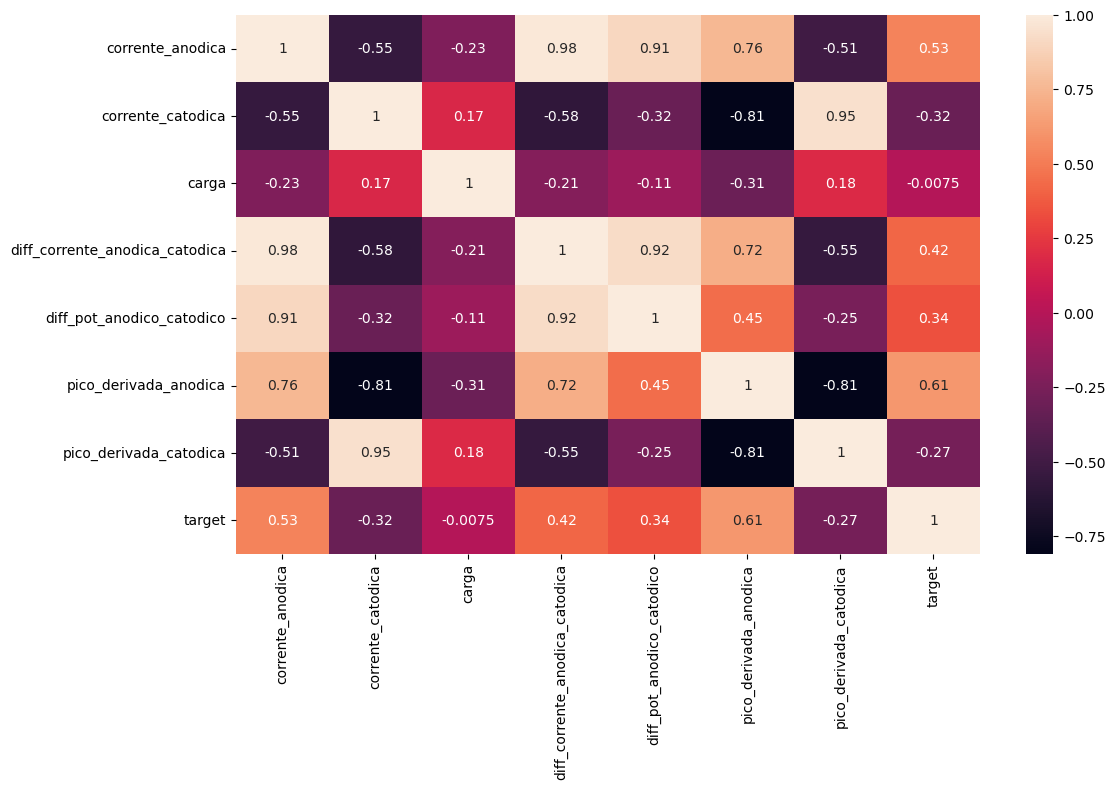

In [16]:
fig, ax = plt.subplots(figsize=(12,7))
ax = sbn.heatmap(df.iloc[:,1:].corr(), annot=True)
plt.show()

In [17]:
# Preparando os dados
X = df.iloc[:,1:-1]
#X.drop(['carga'], axis=1)
y = df['target']

scaler = StandardScaler()
X_train = scaler.fit_transform(X.values)

cv = KFold(n_splits = 5, random_state=seed, shuffle=True)
#Create a model for logistic regression
model = LogisticRegression(max_iter=1000)
scores = cross_validate(model, X_train, y.values, scoring='accuracy', cv = cv, n_jobs=-1, return_estimator=True)
print("Acurracy %.3f", np.mean(np.mean(scores['test_score'])))

Acurracy %.3f 0.8727272727272728


Fold 0
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 1.0




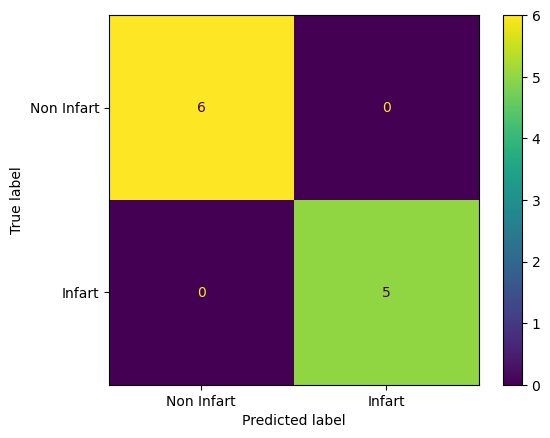

Fold 1
Number of samples: 11
Mean Specificity= 0.875
Mean Sensibility= 0.6666666666666666




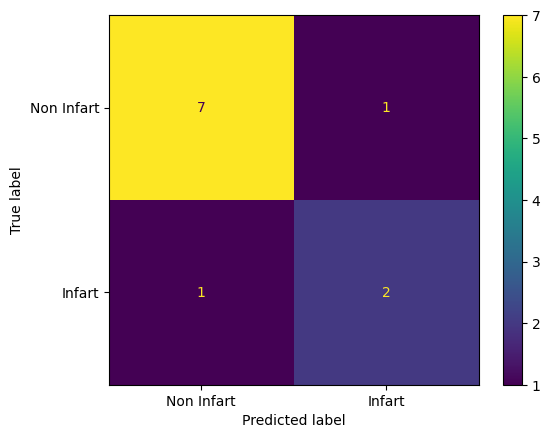

Fold 2
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 1.0




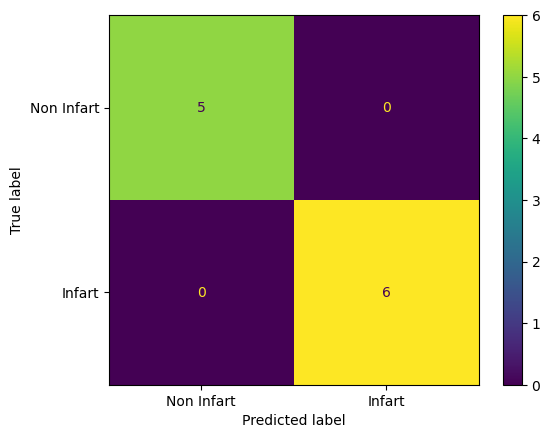

Fold 3
Number of samples: 11
Mean Specificity= 0.8
Mean Sensibility= 0.8333333333333334




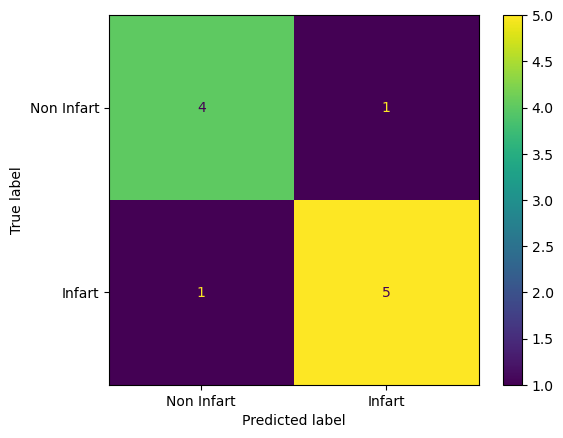

Fold 4
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 1.0




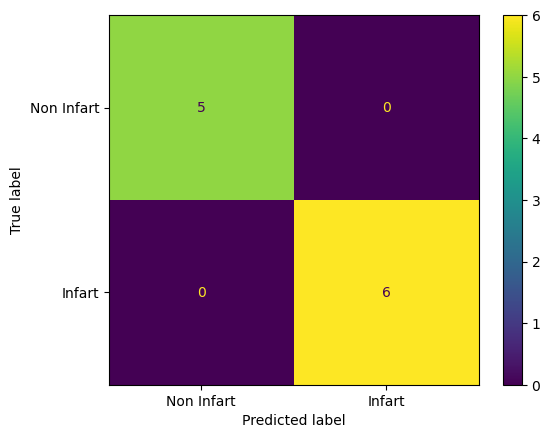

Mean Specificity= 0.9349999999999999 Std: 0.08306623862918074
Mean Sensibility= 0.9  Std: 0.13333333333333336


In [18]:
list_specificity = []
list_sensibility = []
estimators = scores['estimator']

for i, (train_index, test_index) in enumerate(cv.split(X.values)):
    
    X_pred = X_train[test_index]
    y_ground = y.iloc[test_index].values
    y_pred = estimators[0].predict(X_pred)
    tn, fp, fn, tp = confusion_matrix(y_ground, y_pred).ravel()
    sensibility = tp / (tp + fn)
    specificity = tn / (tn + fp)
    list_sensibility.append(sensibility)
    list_specificity.append(specificity)
    
    print(f"Fold {i}")
    print(f'Number of samples: {len(X_pred)}')
    print(f"Mean Specificity= {specificity}")
    print(f"Mean Sensibility= {sensibility}\n\n")
  
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_ground, y_pred), display_labels=['Non Infart', 'Infart']).plot()
    plt.grid(False)
    plt.show()
    
print(f"Mean Specificity= {np.mean(list_specificity)} Std: {np.std(list_specificity)}")
print(f"Mean Sensibility= {np.mean(list_sensibility)}  Std: {np.std(list_sensibility)}\n\n")

Number of samples: 55
Specificity= 0.9310344827586207
Sensibility= 0.9230769230769231




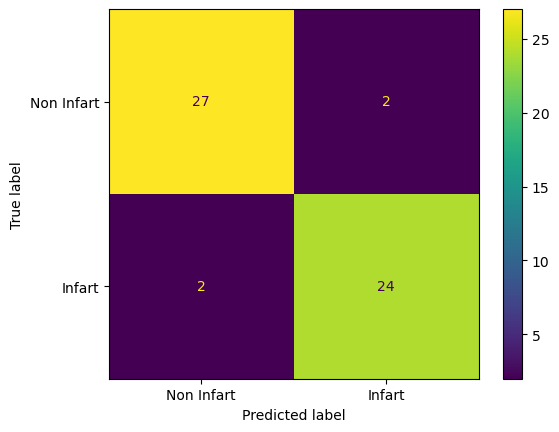

Number of samples: 55
Specificity= 0.896551724137931
Sensibility= 0.8846153846153846




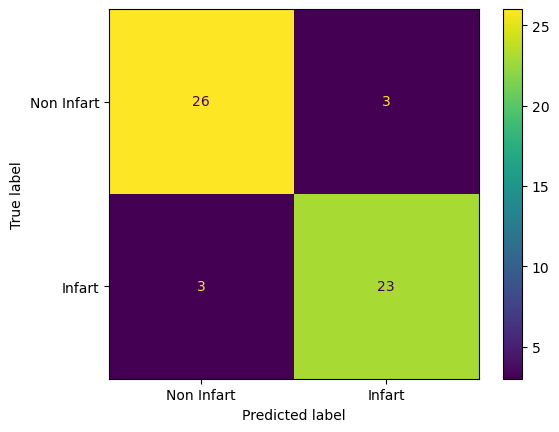

Number of samples: 55
Specificity= 0.9655172413793104
Sensibility= 0.8076923076923077




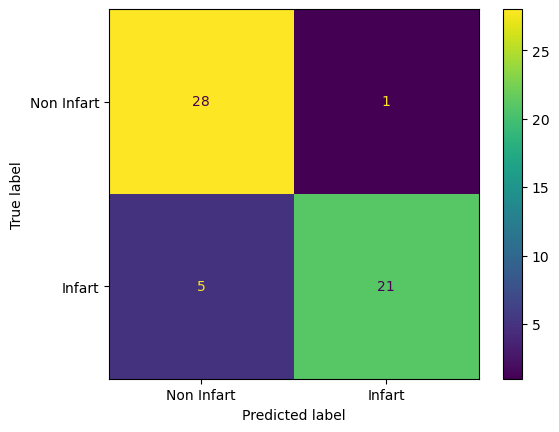

Number of samples: 55
Specificity= 0.9310344827586207
Sensibility= 0.8846153846153846




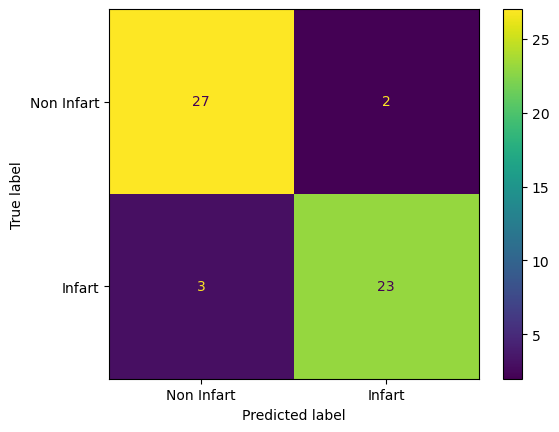

Number of samples: 55
Specificity= 0.9310344827586207
Sensibility= 0.8846153846153846




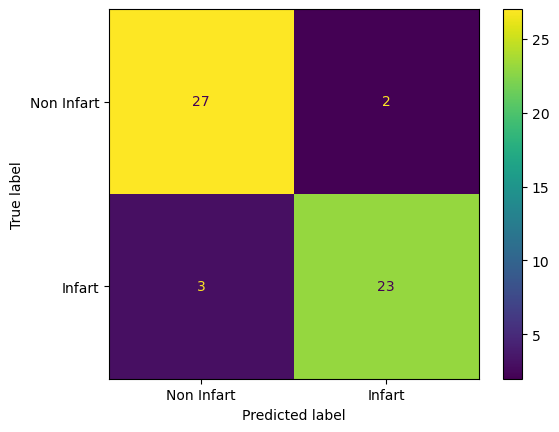

Mean Specificity= 0.9310344827586207 Std: 0.021808811449437106
Mean Sensibility= 0.876923076923077  Std: 0.03768445758127967


In [19]:
# Verificando a media com todos os elementos e classificadores
list_sensibility.clear()
list_specificity.clear()
for i, estimator in enumerate(estimators):
    X_pred = X_train
    y_truth = y.values
    y_pred = estimator.predict(X_pred)
    tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
    sensibility = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f'Number of samples: {len(X_pred)}')
    print(f"Specificity= {specificity}")
    print(f"Sensibility= {sensibility}\n\n")
    list_sensibility.append(sensibility)
    list_specificity.append(specificity)
  
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_truth, y_pred), display_labels=['Non Infart', 'Infart']).plot()
    plt.grid(False)
    plt.show()

print(f"Mean Specificity= {np.mean(list_specificity)} Std: {np.std(list_specificity)}")
print(f"Mean Sensibility= {np.mean(list_sensibility)}  Std: {np.std(list_sensibility)}")

Accuracy: 0.8


Fold 0
Number of samples: 11
Mean Specificity= 0.8333333333333334
Mean Sensibility= 1.0




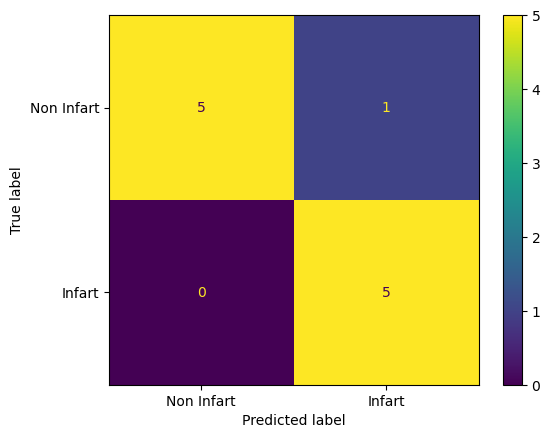

Fold 1
Number of samples: 11
Mean Specificity= 0.75
Mean Sensibility= 0.6666666666666666




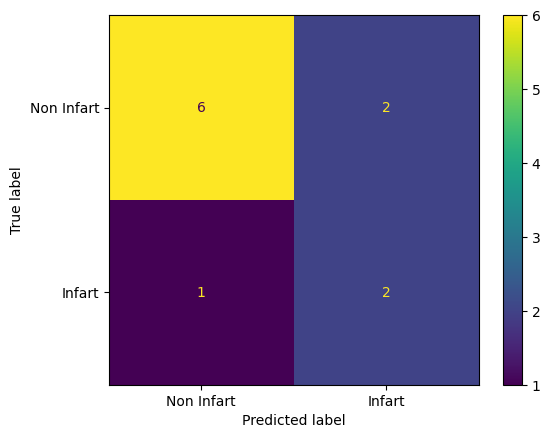

Fold 2
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 0.6666666666666666




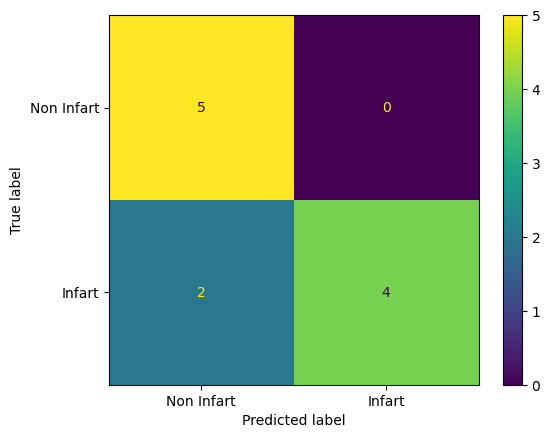

Fold 3
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 1.0




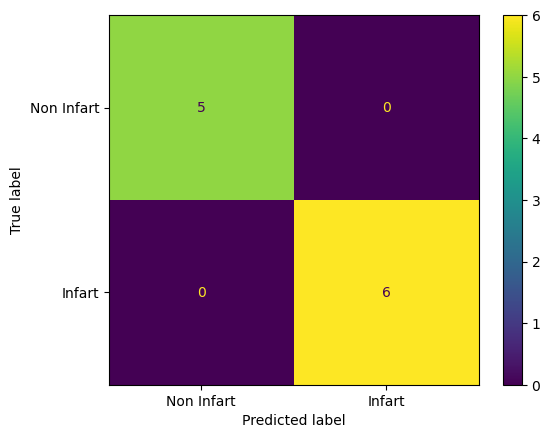

Fold 4
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 0.6666666666666666




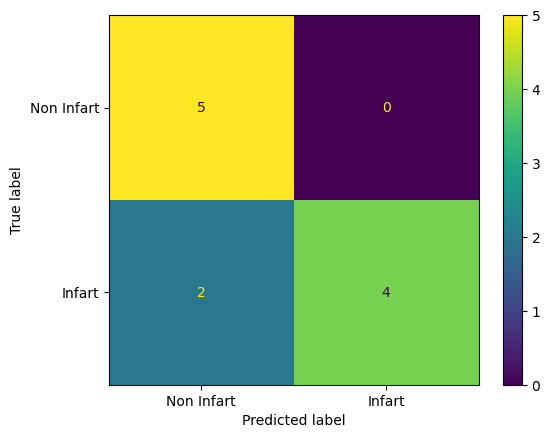

Mean Specificity= 0.9166666666666667 Std: 0.10540925533894598
Mean Sensibility= 0.7999999999999999  Std: 0.16329931618554525
Number of samples: 55
Specificity= 0.896551724137931
Sensibility= 0.8076923076923077




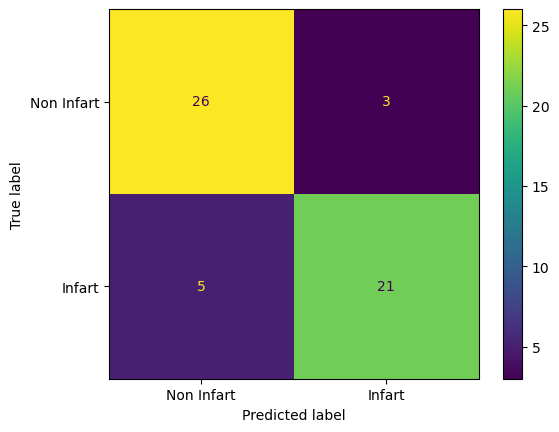

Number of samples: 55
Specificity= 0.8275862068965517
Sensibility= 0.8076923076923077




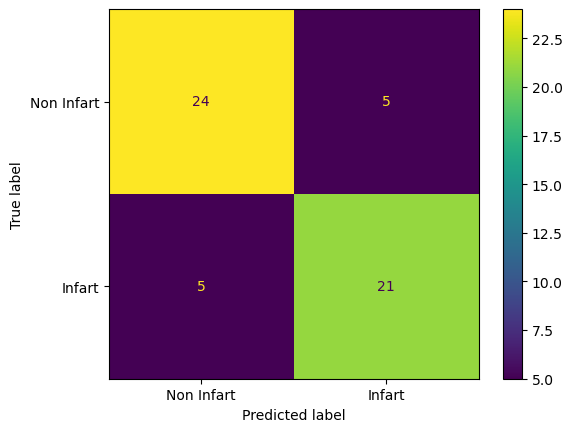

Number of samples: 55
Specificity= 0.8275862068965517
Sensibility= 0.8076923076923077




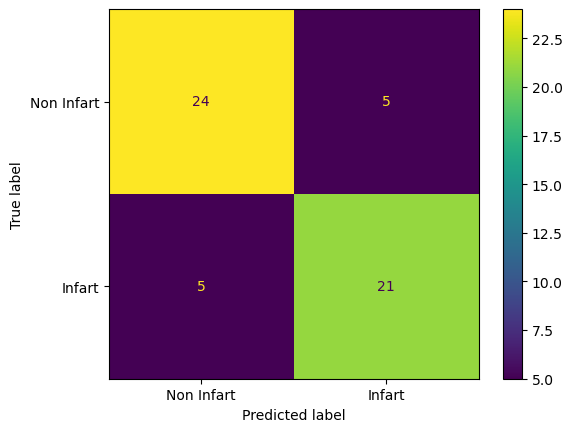

Number of samples: 55
Specificity= 0.9310344827586207
Sensibility= 0.7692307692307693




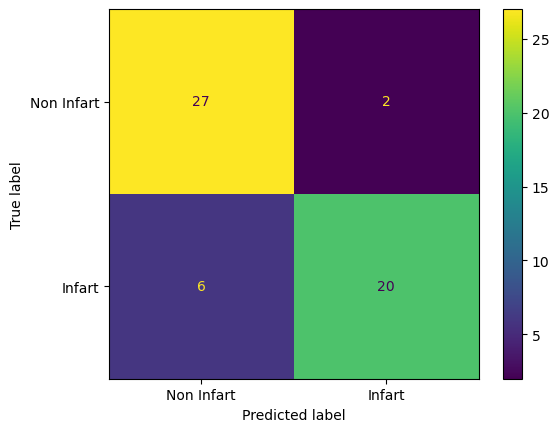

Number of samples: 55
Specificity= 0.9655172413793104
Sensibility= 0.8076923076923077




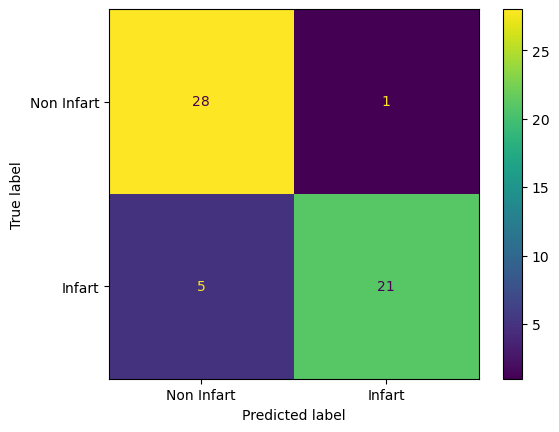

Mean Specificity= 0.8896551724137931 Std: 0.05517241379310346
Mean Sensibility= 0.8  Std: 0.015384615384615375


In [28]:
model = KNeighborsClassifier()
estimators = evaluate_model(model, X_train, y.values, cv)
evaluate_kfold(estimators, X_train, y.values)

Accuracy: 0.7272727272727273


Fold 0
Number of samples: 11
Mean Specificity= 0.6666666666666666
Mean Sensibility= 1.0




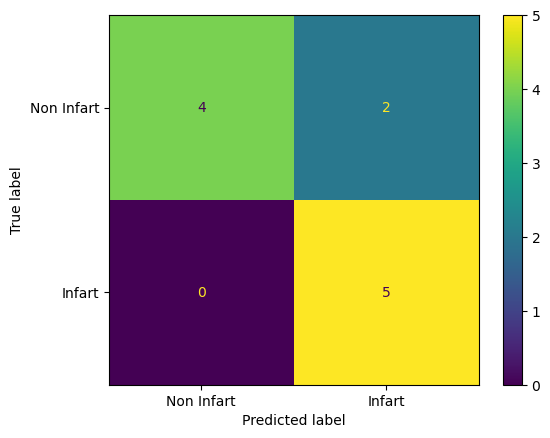

Fold 1
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 1.0




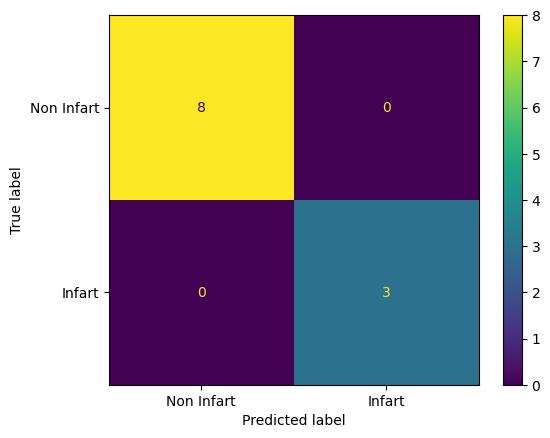

Fold 2
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 1.0




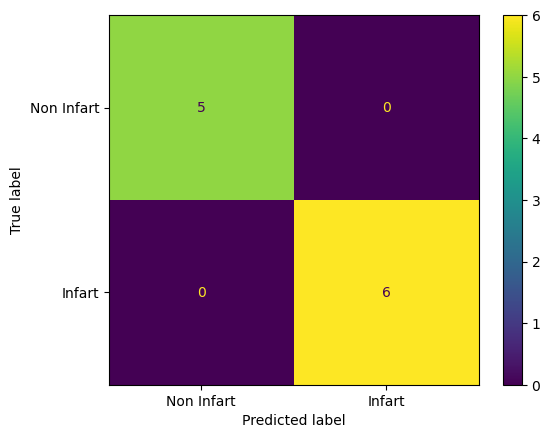

Fold 3
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 1.0




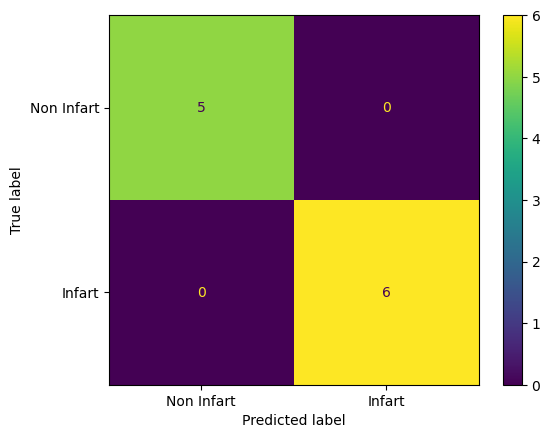

Fold 4
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 1.0




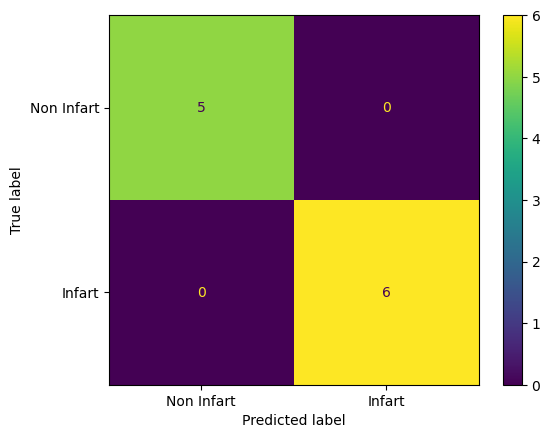

Mean Specificity= 0.9333333333333332 Std: 0.13333333333333336
Mean Sensibility= 1.0  Std: 0.0
Number of samples: 55
Specificity= 0.9310344827586207
Sensibility= 1.0




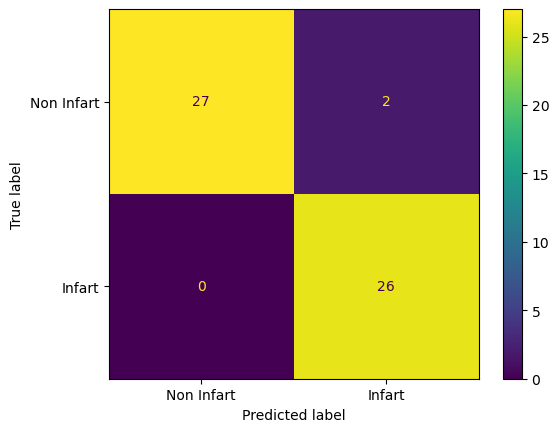

Number of samples: 55
Specificity= 0.8275862068965517
Sensibility= 1.0




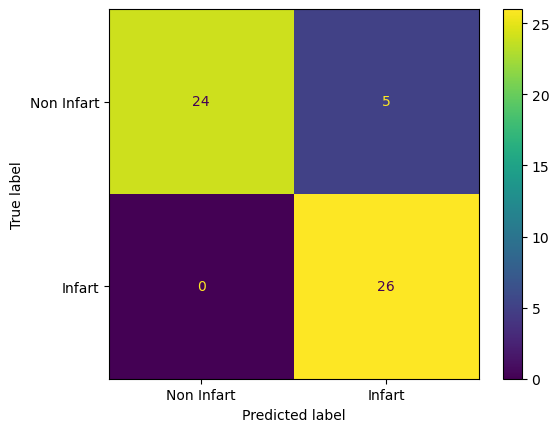

Number of samples: 55
Specificity= 0.9655172413793104
Sensibility= 0.9615384615384616




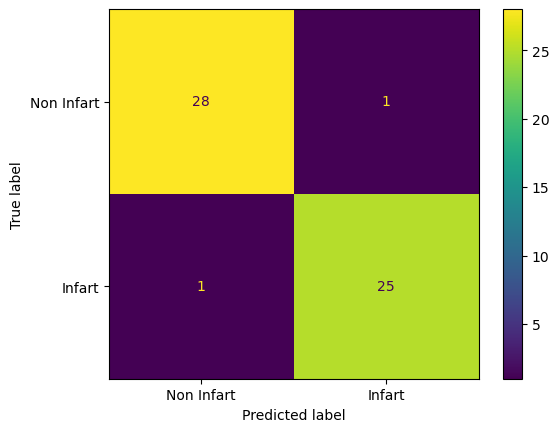

Number of samples: 55
Specificity= 1.0
Sensibility= 0.8461538461538461




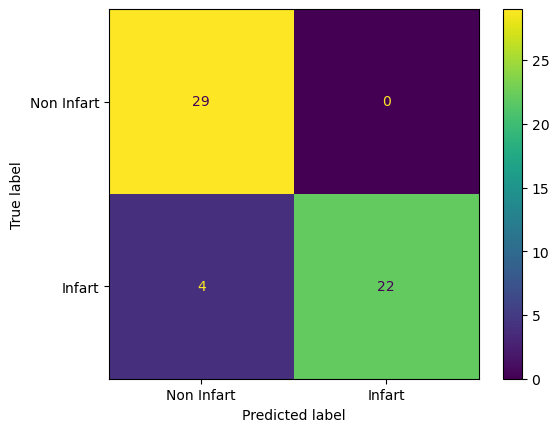

Number of samples: 55
Specificity= 1.0
Sensibility= 0.9230769230769231




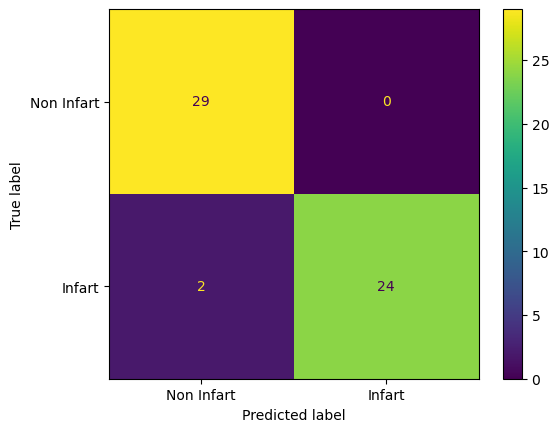

Mean Specificity= 0.9448275862068964 Std: 0.06395598962410831
Mean Sensibility= 0.9461538461538461  Std: 0.05756395979652218


In [31]:
model = DecisionTreeClassifier()
estimators = evaluate_model(model, X_train, y.values, cv)
evaluate_kfold(estimators, X_total=X_train, y_total=y.values)

Accuracy: 0.8181818181818181


Fold 0
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 1.0




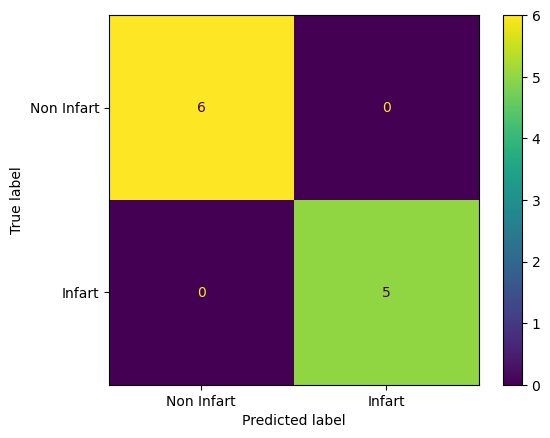

Fold 1
Number of samples: 11
Mean Specificity= 0.875
Mean Sensibility= 0.6666666666666666




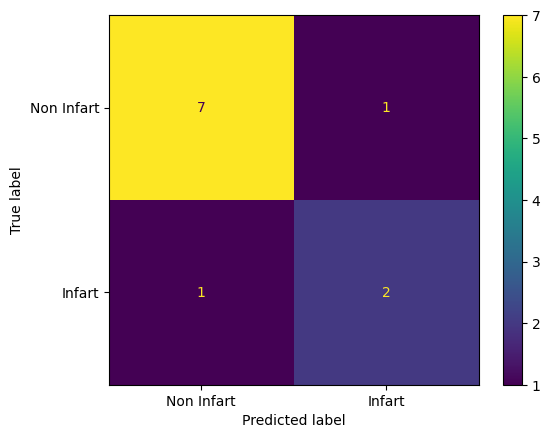

Fold 2
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 0.8333333333333334




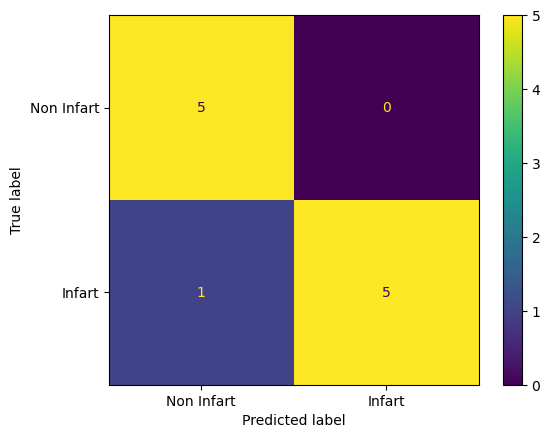

Fold 3
Number of samples: 11
Mean Specificity= 0.8
Mean Sensibility= 0.8333333333333334




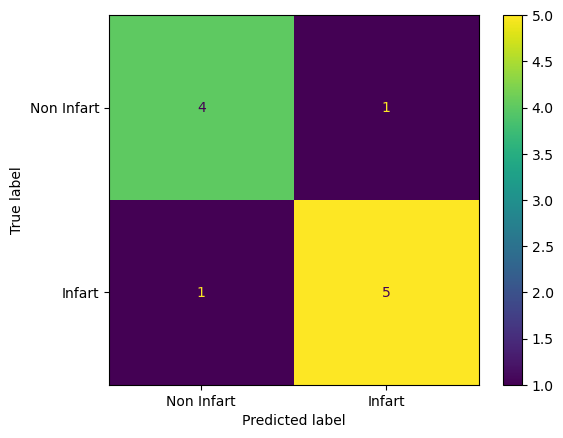

Fold 4
Number of samples: 11
Mean Specificity= 1.0
Mean Sensibility= 0.6666666666666666




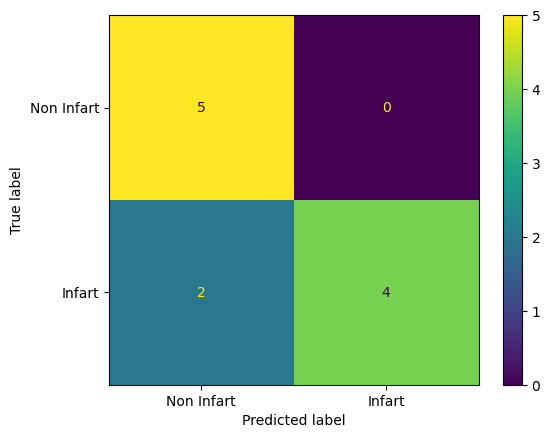

Mean Specificity= 0.9349999999999999 Std: 0.08306623862918074
Mean Sensibility= 0.8  Std: 0.12472191289246473
Number of samples: 55
Specificity= 0.9310344827586207
Sensibility= 0.8076923076923077




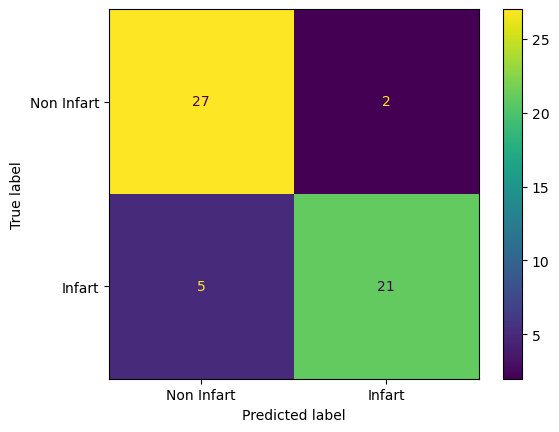

Number of samples: 55
Specificity= 0.8275862068965517
Sensibility= 0.8846153846153846




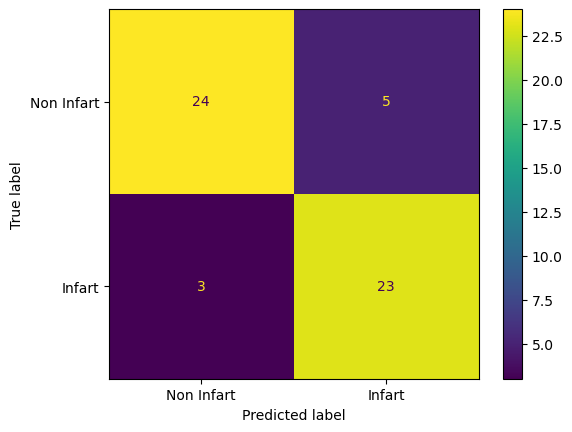

Number of samples: 55
Specificity= 0.9655172413793104
Sensibility= 0.7692307692307693




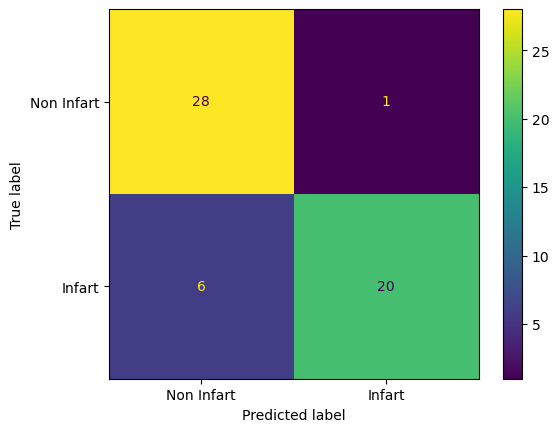

Number of samples: 55
Specificity= 0.9655172413793104
Sensibility= 0.7692307692307693




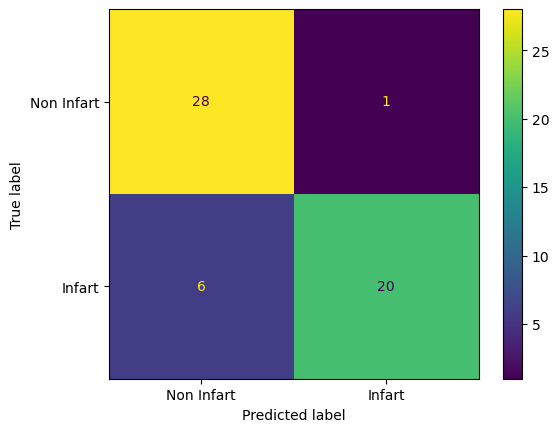

Number of samples: 55
Specificity= 0.9655172413793104
Sensibility= 0.8076923076923077




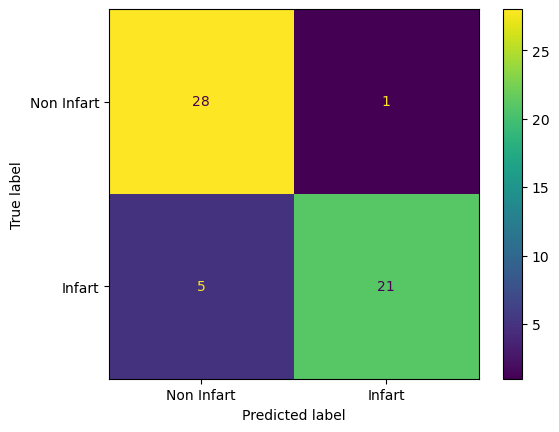

Mean Specificity= 0.9310344827586207 Std: 0.05342045994768853
Mean Sensibility= 0.8076923076923077  Std: 0.042132504423474285


In [33]:
model = SVC()
estimators = evaluate_model(model, X_train, y.values, cv)
evaluate_kfold(estimators, X_total=X_train, y_total=y.values)